# Data Preprocessing for Survey1 (FYP1)

### Import Libraries

In [1]:
!pip install boruta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# Data Preprocessing

In [3]:
df = pd.read_csv('Survey1.csv')
df.head()

,Timestamp,Email address,I have read and agree with the terms and conditions stated above.,Age,Gender,Nationality,Continent,Living Status,Home Town,Relationship Status,...,Study Behavior,Study Time,Extra Curricular Activities,Part-time Job,Commute Time,Gaming,Alcohol Consumption,I have enough free time after class.,Social Interaction,I hang out with friends.
0,17/11/2023 15:43:34,1191100202@student.mmu.edu.my,Yes,21 - 23,Female,Malaysian,NaN,Alone,Urban,No,...,Alone,More than 8,Yes,Yes,Less than 10,Non-gamer,Non-drinker,1,1,3
1,17/11/2023 15:52:22,1191100706@student.mmu.edu.my,Yes,21 - 23,Female,Malaysian,NaN,Friend or roommate,Urban,No,...,Alone,2 - 5,No,No,10 - 30,Moderate,Non-drinker,1,3,2
2,17/11/2023 15:54:03,1191101787@student.mmu.edu.my,Yes,21 - 23,Male,Malaysian,NaN,Friend or roommate,Urban,Yes,...,Alone,Less than 2,No,No,10 - 30,Light,Sometimes,3,1,1
3,17/11/2023 15:59:42,1191102623@student.mmu.edu.my,Yes,24 - 26,Male,Non-Malaysian,Asia,Friend or roommate,Urban,No,...,Alone,Less than 2,No,No,Less than 10,Non-gamer,Non-drinker,3,1,2
4,17/11/2023 16:05:31,1191101436@student.mmu.edu.my,Yes,21 - 23,Male,Malaysian,NaN,Family,Urban,No,...,Alone,Less than 2,Yes,No,30 - 60,Heavy,Non-drinker,5,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 45 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Timestamp                                                          802 non-null    object
 1   Email address                                                      802 non-null    object
 2   I have read and agree with the terms and conditions stated above.  802 non-null    object
 3   Age                                                                802 non-null    object
 4   Gender                                                             802 non-null    object
 5   Nationality                                                        802 non-null    object
 6   Continent                                                          106 non-null    object
 7   Living Status                      

In [5]:
df.isnull().sum()

Timestamp                                                              0
Email address                                                          0
I have read and agree with the terms and conditions stated above.      0
Age                                                                    0
Gender                                                                 0
Nationality                                                            0
Continent                                                            696
Living Status                                                          0
Home Town                                                              0
Relationship Status                                                    0
Faculty                                                                0
Education Level                                                        0
Years of Study                                                         0
Completed Credit Hours                             

In [6]:
df.rename(columns={"Parent's Education Level [Father]": "Parent's Education Level.Father"}, inplace=True)

In [7]:
df.rename(columns={"Parent's Education Level [Mother]": "Parent's Education Level.Mother"}, inplace=True)
df.rename(columns={'I have enough free time after class.': 'I have enough free time after class'}, inplace=True)
df.rename(columns={'I hang out with friends.': 'I hang out with friends'}, inplace=True)

In [8]:
df['CGPA'] = df['CGPA'].fillna('None')
df['Skipping Class'] = df['Skipping Class'].fillna('None')
df["Parent's Education Level.Father"] = df["Parent's Education Level.Father"].fillna('None')
df["Parent's Education Level.Mother"] = df["Parent's Education Level.Mother"].fillna('None')
df["Father's Occupation"] = df["Father's Occupation"].fillna('None')

In [9]:
df.isnull().sum()

Timestamp                                                              0
Email address                                                          0
I have read and agree with the terms and conditions stated above.      0
Age                                                                    0
Gender                                                                 0
Nationality                                                            0
Continent                                                            696
Living Status                                                          0
Home Town                                                              0
Relationship Status                                                    0
Faculty                                                                0
Education Level                                                        0
Years of Study                                                         0
Completed Credit Hours                             

In [10]:
cleaning = df.copy()

In [11]:
cleaning.columns = cleaning.columns.str.rstrip()

In [12]:
cleaning.rename(columns = {'Classroom Environment':'Classroom Facilities'}, inplace = True)

In [13]:
cleaning.drop(['Timestamp', 'Email address', 'I have read and agree with the terms and conditions stated above.'], axis=1, inplace = True)

In [14]:
cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Age                                    802 non-null    object
 1   Gender                                 802 non-null    object
 2   Nationality                            802 non-null    object
 3   Continent                              106 non-null    object
 4   Living Status                          802 non-null    object
 5   Home Town                              802 non-null    object
 6   Relationship Status                    802 non-null    object
 7   Faculty                                802 non-null    object
 8   Education Level                        802 non-null    object
 9   Years of Study                         802 non-null    object
 10  Completed Credit Hours                 802 non-null    object
 11  CGPA               

In [15]:
cleaning['SPM Result (A)'] = cleaning['SPM Result (A)'].apply(str)
cleaning['SPM Result (B)'] = cleaning['SPM Result (B)'].apply(str)
cleaning['SPM Result (C)'] = cleaning['SPM Result (C)'].apply(str)
cleaning['I have enough free time after class'] = cleaning['I have enough free time after class'].apply(str)
cleaning['Social Interaction'] = cleaning['Social Interaction'].apply(str)
cleaning['I hang out with friends'] = cleaning['I hang out with friends'].apply(str)

In [16]:
cleaning.Nationality.value_counts()

Nationality
Malaysian        763
Non-Malaysian     39
Name: count, dtype: int64

In [17]:
malaysian = cleaning.loc[(cleaning['Nationality'] == 'Malaysian') & (cleaning['Continent'].str.contains(''))]

to_replace = {'Asia': np.nan, 'Europe': np.nan, 'Australia': np.nan}

for key, value in to_replace.items():
    malaysian = malaysian.replace(key, value)

In [18]:
continent = cleaning[(cleaning['Nationality'] == 'Malaysian') & (cleaning['Continent'].str.contains(''))].index
cleaning.drop(continent , inplace=True)

In [19]:
frames = [malaysian, cleaning]

cleaned = pd.concat(frames)

cleaned = cleaned.reset_index(drop = True)

In [20]:
cleaned.isnull().sum()

Age                                        0
Gender                                     0
Nationality                                0
Continent                                761
Living Status                              0
Home Town                                  0
Relationship Status                        0
Faculty                                    0
Education Level                            0
Years of Study                             0
Completed Credit Hours                     0
CGPA                                       0
Number of Subjects Failed                  0
SPM Result (A)                             0
SPM Result (B)                             0
SPM Result (C)                             0
Scholarship                                0
PTPTN                                      0
Reason Study at Multimedia University      0
Lecture Class Capacity                     0
Tutorial Class Capacity                    0
Skipping Class                             0
Classroom 

In [21]:
# Since Continent has 761 NaN, 761/802 = 0.95 of NaN, hence column continent can be dropped

cleaned.drop(['Continent'], axis=1, inplace = True)

In [22]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Age                                    802 non-null    object
 1   Gender                                 802 non-null    object
 2   Nationality                            802 non-null    object
 3   Living Status                          802 non-null    object
 4   Home Town                              802 non-null    object
 5   Relationship Status                    802 non-null    object
 6   Faculty                                802 non-null    object
 7   Education Level                        802 non-null    object
 8   Years of Study                         802 non-null    object
 9   Completed Credit Hours                 802 non-null    object
 10  CGPA                                   802 non-null    object
 11  Number of Subjects 

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Binary Classification Preprocessing

## Binary Data Transformation

In [24]:
none = cleaned.loc[(cleaned['CGPA'] == 'None')].index
tclasses1 = cleaned.copy()
tclasses1.drop(none, inplace = True)

In [25]:
tclasses1.to_csv('CSurvey1.csv', index = False)

In [26]:
tclasses1 = tclasses1.replace('Below Par', 'Fail')
tclasses1 = tclasses1.replace(['Low', 'Average', 'Good', 'Very Good'], 'Pass')

In [27]:
CSurvey1_Trans_Binary_imb = tclasses1.copy()
tcate1_imb = CSurvey1_Trans_Binary_imb.select_dtypes(include=['object'])
CSurvey1_Trans_Binary_imb = tcate1_imb.apply(label_encoder.fit_transform)

In [28]:
# CSurvey1_Trans_Binary_imb.to_csv('CSurvey1_Trans_Binary_imb.csv', index = False)

## Binary Data Balancing using RandomOverSampler

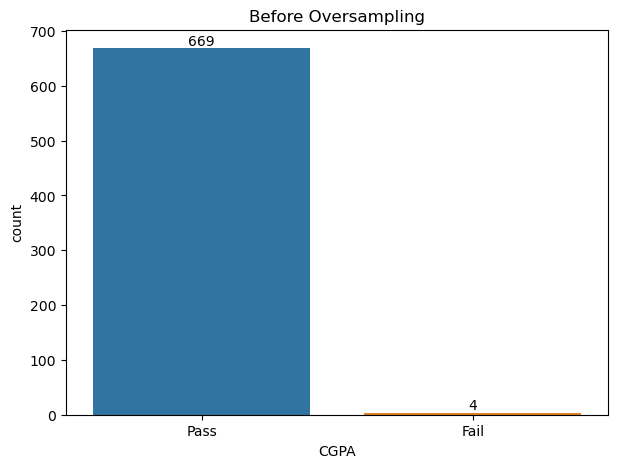

In [29]:
plt.figure(figsize = (7,5))
plt.title("Before Oversampling")
ax = sns.countplot(x = 'CGPA', data = tclasses1)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 1 Before Oversampling.png', dpi=300)
plt.show()

In [30]:
t_y = tclasses1.CGPA
t_X = tclasses1.drop("CGPA", axis = 1)
t_colnames = t_X.columns

In [31]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [32]:
ros = RandomOverSampler(sampling_strategy = 'auto')
os_tX, os_ty = ros.fit_resample(t_X, t_y)

tX = tclasses1.drop("CGPA", axis = 1)
t_columns = tX.columns

length of oversampled data is  1338


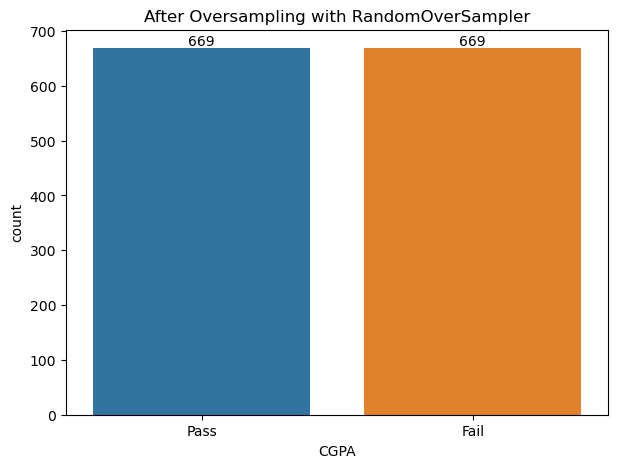

In [33]:
os_tX = pd.DataFrame(data = os_tX, columns = t_columns)
os_ty = pd.DataFrame(data = os_ty, columns = ['CGPA'])
print("length of oversampled data is ", len(os_tX))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with RandomOverSampler")
ax = sns.countplot(x = 'CGPA', data = os_ty)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 1 After RandomOversampling.png', dpi=300)
plt.show()

In [34]:
frames1 = [os_tX, os_ty]

tros1 = pd.concat(frames1, axis = 1)

tros1.shape

(1338, 41)

In [35]:
CSurvey1_Trans_Binary = tros1.copy()
tcate1 = CSurvey1_Trans_Binary.select_dtypes(include=['object'])
CSurvey1_Trans_Binary = tcate1.apply(label_encoder.fit_transform)

In [36]:
# CSurvey1_Trans_Binary.to_csv('CSurvey1_Trans_Binary_ROS.csv', index = False)

## Binary Data Balancing using SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
t_y_encode = CSurvey1_Trans_Binary_imb.CGPA
t_X_encode = CSurvey1_Trans_Binary_imb.drop("CGPA", axis = 1)
t_colnames = t_X.columns

In [39]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=3)

os_tX_smote, os_ty_smote = smote.fit_resample(t_X_encode, t_y_encode)

length of oversampled data is  1338


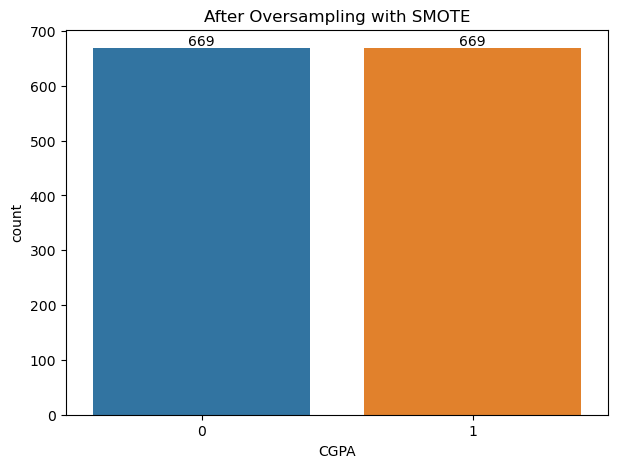

In [40]:
os_tX_smote = pd.DataFrame(data = os_tX_smote, columns = t_columns)
os_ty_smote = pd.DataFrame(data = os_ty_smote, columns = ['CGPA'])
print("length of oversampled data is ", len(os_tX_smote))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with SMOTE")
ax = sns.countplot(x = 'CGPA', data = os_ty_smote)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 1 After SMOTE.png', dpi=300)
plt.show()

In [41]:
frames2 = [os_tX_smote, os_ty_smote]

tros2 = pd.concat(frames2, axis = 1)

tros2.shape

(1338, 41)

In [42]:
CSurvey1_Trans_Binary_SMOTE = tros2.copy()
tcate2 = CSurvey1_Trans_Binary_SMOTE.select_dtypes(include=['object'])
# CSurvey1_Trans_Binary_SMOTE = tcate2.apply(label_encoder.fit_transform)

In [43]:
# CSurvey1_Trans_Binary_SMOTE.to_csv('CSurvey1_Trans_Binary_SMOTE.csv', index = False)

# 5-Level Classification Preprocessing

## 5-Level Data Transformation

In [44]:
none = cleaned.loc[(cleaned['CGPA'] == 'None')].index
fclasses1 = cleaned.copy()
fclasses1.drop(none, inplace = True)

In [45]:
CSurvey1_Trans_5level_imb = fclasses1.copy()
fcate1_imb = CSurvey1_Trans_5level_imb.select_dtypes(include=['object'])
CSurvey1_Trans_5level_imb = fcate1_imb.apply(label_encoder.fit_transform)

In [46]:
# CSurvey1_Trans_5level_imb.to_csv('CSurvey1_Trans_5level_imb.csv', index = False)

## 5-Level Data Balancing using RandomOverSampler

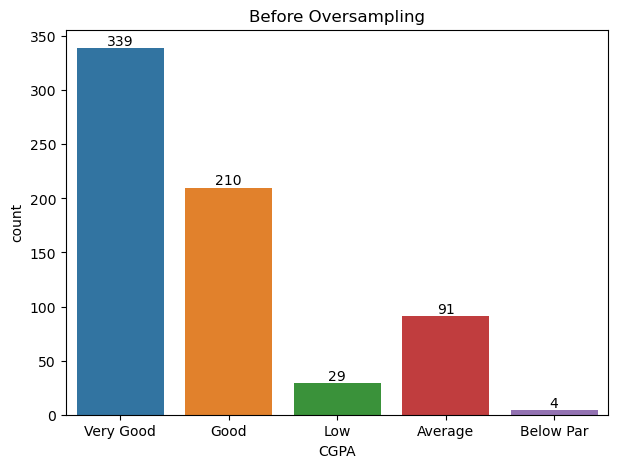

In [47]:
plt.figure(figsize = (7,5))
plt.title("Before Oversampling")
ax = sns.countplot(x = 'CGPA', data = fclasses1)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 1 5 classes  Before Oversampling.png', dpi=300)
plt.show()

In [48]:
f_y = fclasses1.CGPA
f_X = fclasses1.drop("CGPA", axis = 1)
f_colnames = f_X.columns

In [49]:
ros = RandomOverSampler(sampling_strategy = 'auto')
os_fX, os_fy = ros.fit_resample(f_X, f_y)

fX = fclasses1.drop("CGPA", axis = 1)
f_columns = fX.columns

length of oversampled data is  1695


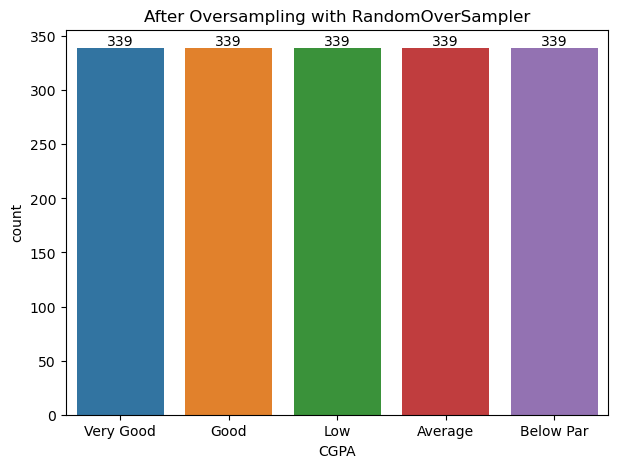

In [50]:
os_fX = pd.DataFrame(data = os_fX, columns = f_columns)
os_fy = pd.DataFrame(data = os_fy, columns = ['CGPA'])
print("length of oversampled data is ", len(os_fX))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with RandomOverSampler")
ax = sns.countplot(x = 'CGPA', data = os_fy)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 1 5 classes  After RandomOversampling.png', dpi=300)
plt.show()

In [51]:
frames = [os_fX, os_fy]

fros1 = pd.concat(frames, axis = 1)

fros1.shape

(1695, 41)

In [52]:
CSurvey1_Trans_5level = fros1.copy()
fcate1 = CSurvey1_Trans_5level.select_dtypes(include=['object'])
CSurvey1_Trans_5level = fcate1.apply(label_encoder.fit_transform)

In [53]:
# CSurvey1_Trans_5level.to_csv('CSurvey1_Trans_5level_ROS.csv', index = False)

## 5-Level Data Balancing using SMOTE

In [54]:
f_y_encode = CSurvey1_Trans_5level_imb.CGPA
f_X_encode = CSurvey1_Trans_5level_imb.drop("CGPA", axis = 1)
f_colnames = f_X.columns

In [55]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=3)

os_fX_smote, os_fy_smote = smote.fit_resample(f_X_encode, f_y_encode)

length of oversampled data is  1695


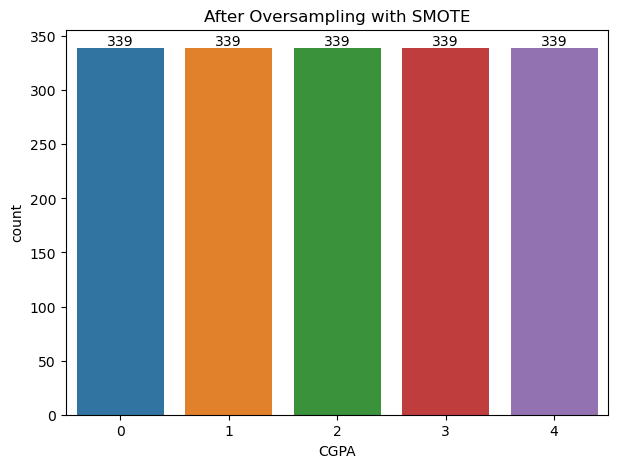

In [56]:
os_fX_smote = pd.DataFrame(data = os_fX_smote, columns = t_columns)
os_fy_smote = pd.DataFrame(data = os_fy_smote, columns = ['CGPA'])
print("length of oversampled data is ", len(os_fX_smote))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with SMOTE")
ax = sns.countplot(x = 'CGPA', data = os_fy_smote)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 1 5 classes After SMOTE.png', dpi=300)
plt.show()

In [57]:
frames = [os_fX_smote, os_fy_smote]

fros2 = pd.concat(frames, axis = 1)

fros2.shape

(1695, 41)

In [58]:
CSurvey1_Trans_5level_SMOTE = fros2.copy()
fcate2 = CSurvey1_Trans_5level_SMOTE.select_dtypes(include=['object'])
# CSurvey1_Trans_5level_SMOTE = fcate2.apply(label_encoder.fit_transform)

In [59]:
# CSurvey1_Trans_5level_SMOTE.to_csv('CSurvey1_Trans_5level_SMOTE.csv', index = False)